<a href="https://colab.research.google.com/github/AryamanPurohit/HumanActivityRecognizer/blob/main/HumanActivityRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description of the Dataset

**The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.**


## Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

## **Table of Contents**

1. **Importing necessary libraries**
2. **Loading data**
3. **Data preprocessing**
    - 3.a Checking for duplicates
    - 3.b Checking for missing values
    - 3.c Checking for class imbalance
4. **Exploratory Data Analysis**
    - 4.a Analysing tBodyAccMag-mean feature
    - 4.b Analysing Angle between X-axis and gravityMean feature
    - 4.c Analysing Angle between Y-axis and gravityMean feature
    - 4.d Visualizing data using t-SNE
5. **Model Prediction and Evaluation**
    - 5.a Logistic regression model with Hyperparameter tuning and cross validation
    - 5.b Linear SVM model with Hyperparameter tuning and cross validation
    - 5.c Kernel SVM model with Hyperparameter tuning and cross validation
    - 5.d Decision tree model with Hyperparameter tuning and cross validation
    - 5.e Random forest model with Hyperparameter tuning and cross validation

## 1. Importing necesary Libraries <a class="anchor" id="library">

In [2]:
# To ignore Warnings
import warnings
warnings.filterwarnings("ignore")
# To manipulate and visualize data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For ML Model and it's performance
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## 2. Loading the Data

In [3]:
train = pd.read_csv('train.csv')
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [4]:
test = pd.read_csv('test.csv')
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.347731,-0.032157,-0.098822,-0.156174,0.043034,-0.357678,-0.242008,-0.107938,-0.309664,0.222755,...,-0.570264,-0.782822,0.777496,-0.761512,-0.618794,-0.804792,0.230680,-0.008339,10,WALKING
995,0.220061,-0.015905,-0.126731,-0.198277,-0.032091,-0.446172,-0.279805,-0.150247,-0.399941,0.222755,...,-0.506324,0.717971,0.202447,-0.683921,0.278074,-0.800463,0.234092,-0.006167,10,WALKING
996,0.240172,-0.010125,-0.132276,-0.324234,0.086649,-0.445843,-0.388274,-0.006090,-0.378945,-0.041089,...,-0.728757,0.534596,-0.692795,-0.497539,-0.012647,-0.801466,0.233206,-0.007254,10,WALKING
997,0.326055,0.016412,-0.128606,-0.335340,0.194411,-0.419720,-0.386108,0.060010,-0.372052,-0.184208,...,-0.641198,-0.182979,-0.049838,-0.143235,0.557818,-0.804601,0.230581,-0.009566,10,WALKING


In [5]:
# Total Subjects:
total_subjects_train = train['subject'].nunique()
total_subjects_test = test['subject'].nunique()
print("Total Subjects:", total_subjects_train+total_subjects_test)


Total Subjects: 25


## 3. Data preprocessing

##### 3.a Checking of duplicates

In [6]:
print("Total Duplicated Values in train: ",sum(train.duplicated()))
print("Total Duplicated Values in test: ",sum(test.duplicated()))

Total Duplicated Values in train:  0
Total Duplicated Values in test:  0


##### 3.b Checking for missing values

In [7]:
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in test : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in test :  0


##### 3.c Checking for class imbalance

<Axes: xlabel='count', ylabel='Activity'>

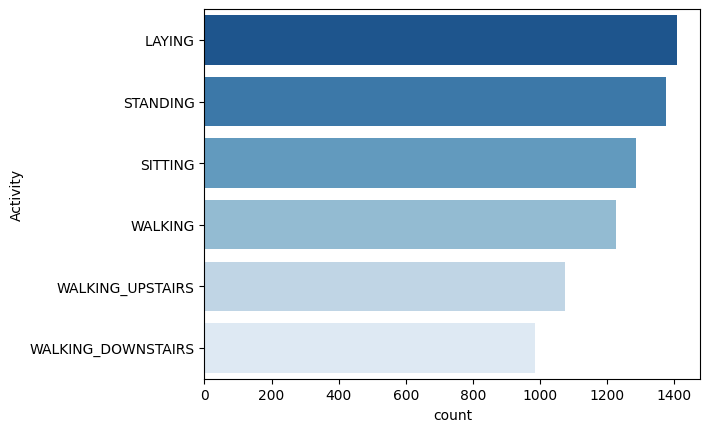

In [14]:
sns.countplot(train['Activity'], order = train['Activity'].value_counts().index, palette="Blues_r")

In [15]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Note that all classes have sufficient  and almost equal amount of data.

## 4. Exploratory Data Analysis

In [16]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Note that we have many features

In [11]:
list_features=[col.split('-')[0].split('(')[0] for col in train.columns]
list_features

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [12]:
dict_with_counts=Counter(list_features)
dict_with_counts

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [13]:
pd.DataFrame.from_dict(dict_with_counts, orient = "index").rename(columns = {0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Mainly there are acceleration and gyroscope features. A few gravity features are there as well. Impressive how many features there are in regard of the limited number of sensors used.

Based on the common nature of activities we can broadly put them in two categories.
- **Static activities :**
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
- **Dynamic activities :**    
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAccMag-mean()** feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the **activity** using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

#### 4.a Analysing tBodyAccMag-mean feature

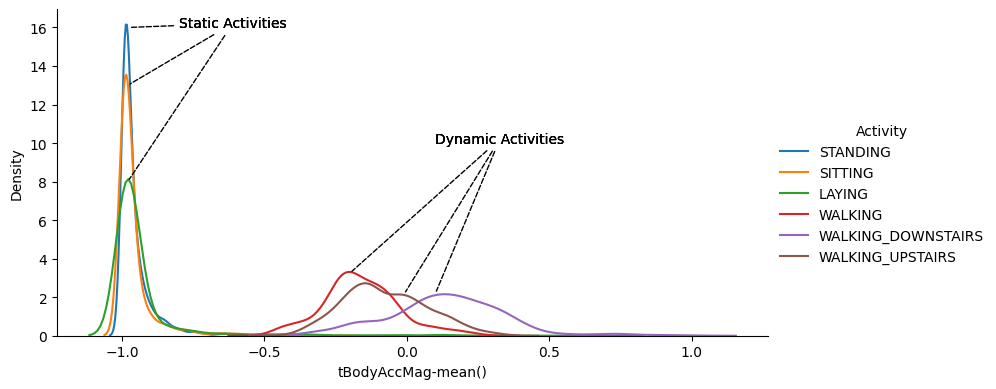

In [34]:
facetGrid = sns.FacetGrid(train, hue='Activity', height = 4, aspect=2)
facetGrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 10),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 10),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 10),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.

```
if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
```

**Box plots**

Text(0.5, 1.0, 'Boxplot of tBodyAccMag-mean() column across various activities')

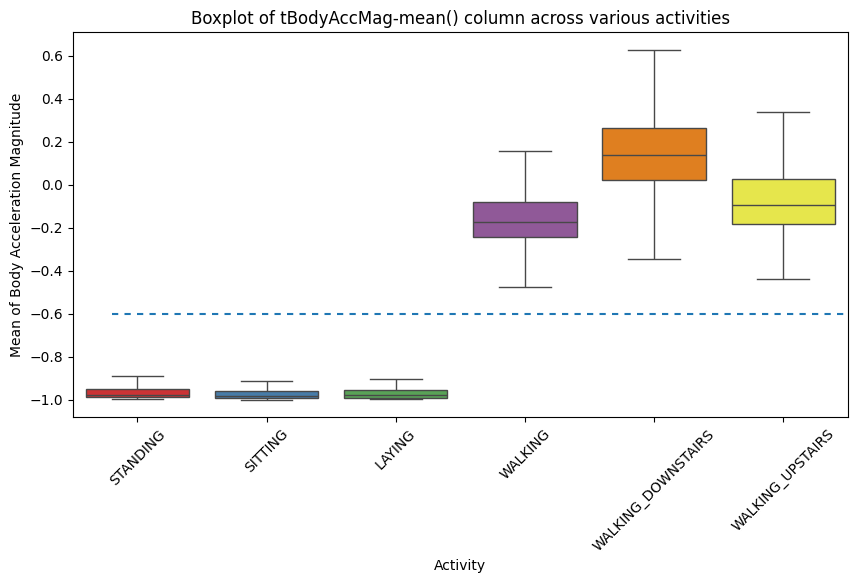

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x= 'Activity', y ='tBodyAccMag-mean()', data = train, showfliers = False , palette = 'Set1')
plt.axhline(y = -0.6, xmin = 0.05, dashes = (3,3))

plt.xticks(rotation = 45)

plt.ylabel('Mean of Body Acceleration Magnitude')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

```
if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
```

#### 4.b Analysing Angle between X-axis and gravityMean feature

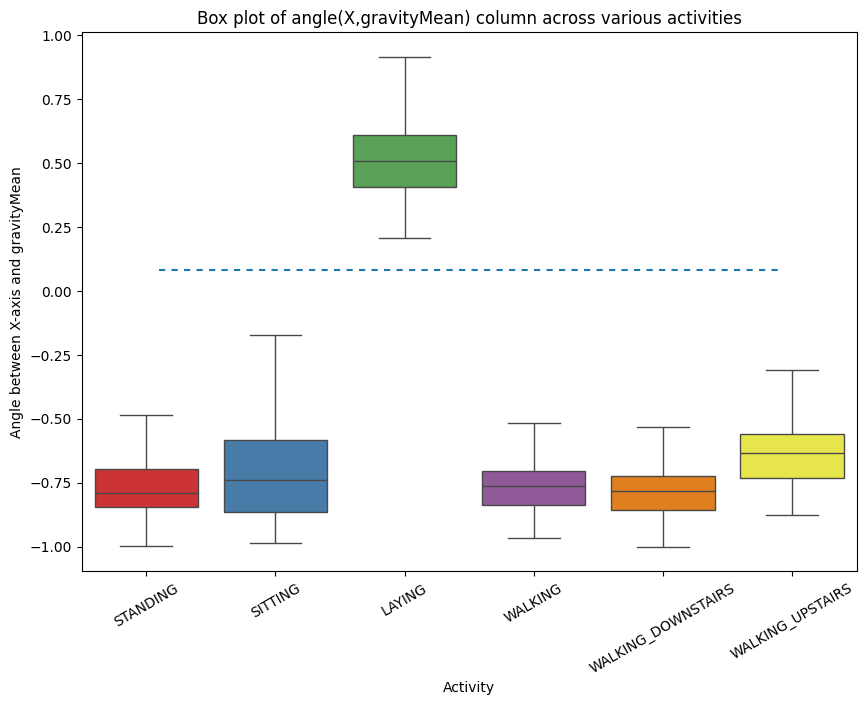

In [51]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train,palette= "Set1", showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
```
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

#### 4.c Analysing Angle between Y-axis and gravityMean feature

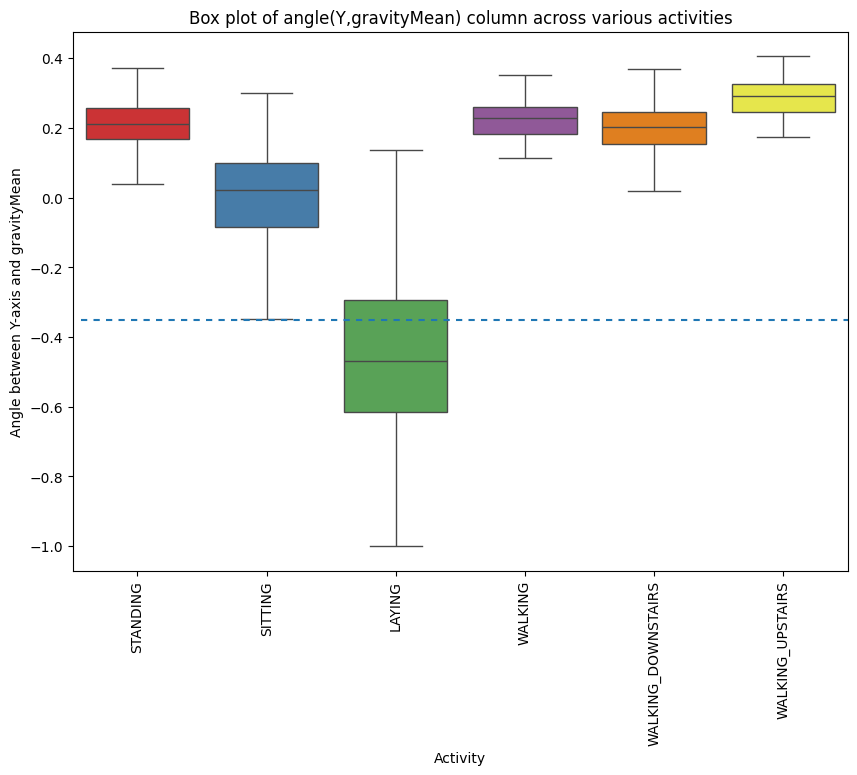

In [55]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, palette ="Set1", showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.


### 4.d Visualizing data using PCA

Using PCA data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using PCA let's visualize it to a 2D space.

In [81]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [82]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

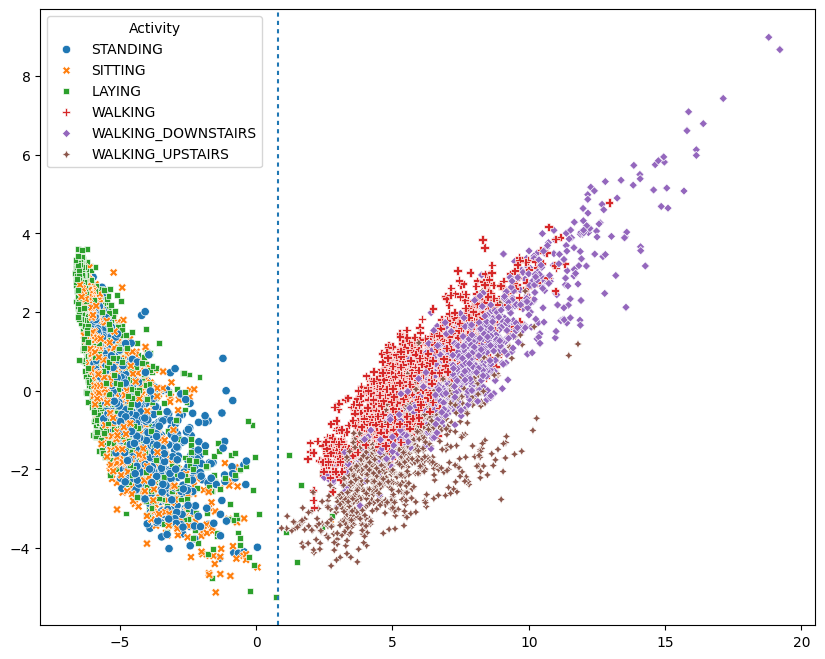

In [96]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'], style=train['Activity'])
plt.axvline(x=0.8, dashes=(2,2))
plt.show()

Using the two new components obtained through PCA we can visualize and seperate all the six activities in a 2D space.

Using PCA we are able to classify static vs dynamic,  but we cant classify laying vs Sitting and Standing

### 4.d Visualizing data using t-SNE

In [86]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [87]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

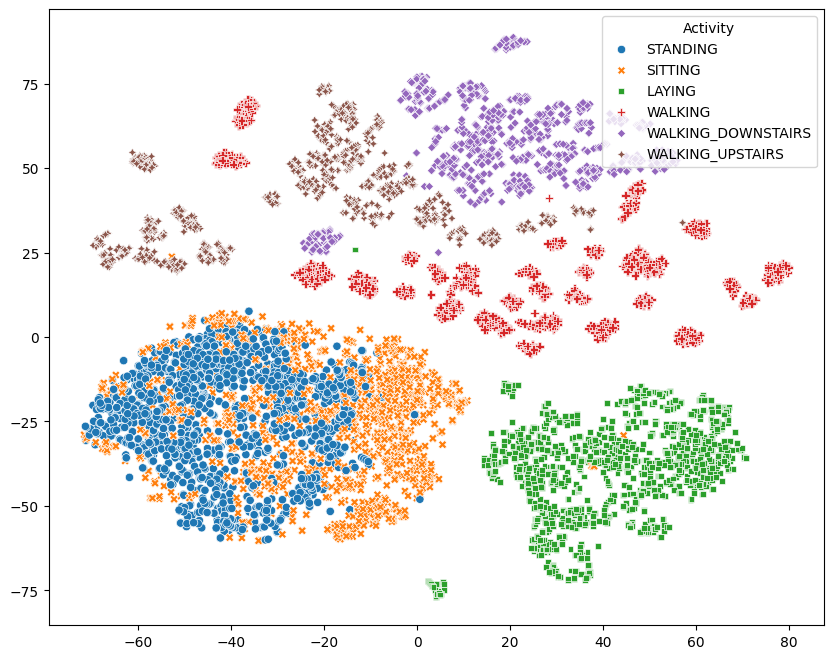

In [99]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = tsne[:, 1], y = tsne[:, 0], hue = train['Activity'], style=train['Activity'])
plt.show()

Note that using tSNE we are not only able to classify static vs dynamic but we are also able to separate out Laying from Standing and Sitting

# 5. Machine Learning models

Separating Input Features and Target Feature

In [100]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train['Activity']
X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test['Activity']

In [101]:
print('Input Training data size : ', X_train.shape)
print('Input Test data size : ', X_test.shape)

Input Training data size :  (7352, 561)
Input Test data size :  (999, 561)


### 5.a Logistic regression model with Hyperparameter tuning and cross validation

In [105]:
lr = LogisticRegression()
parameters = {'max_iter': [100, 200, 500],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'multi_class': ['ovr', 'multinomial']
              }
lr_rs = RandomizedSearchCV(lr, param_distributions= parameters, cv = 5, random_state=0)
lr_rs.fit(X_train, y_train)
pred_lr = lr_rs.predict(X_test)

In [111]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)

In [112]:
# getting best random search attributes
get_best_randomsearch_results(lr_rs)

Best estimator :  LogisticRegression(C=100, multi_class='ovr')
Best set of parameters :  {'multi_class': 'ovr', 'max_iter': 100, 'C': 100}


In [114]:
cm = confusion_matrix(y_test.values,pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  1, 144,  22,   0,   0,   3],
       [  0,   7, 170,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   9,   0, 140]])

In [125]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred= pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9569569569569569


## 5.b Kernel SVM model with Hyperparameter tuning and cross validation

In [115]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 5, random_state=0)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=0)

In [118]:
pred_svm = svm_rs.predict(X_test)

In [123]:
cm = confusion_matrix(y_test.values,pred_svm)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   5, 173,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]])

In [127]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC(C=100)
Best set of parameters :  {'kernel': 'rbf', 'C': 100}


In [126]:
svm_accuracy = accuracy_score(y_true=y_test, y_pred=pred_svm)
print("Accuracy using Kernel SVM : ", svm_accuracy)

Accuracy using Kernel SVM :  0.9679679679679679


## 5.c Decision tree model with Hyperparameter tuning and cross validation

In [129]:
parameters = {'max_depth': np.arange(2, 10, 2),
              'criterion': ['gini', 'entropy']}

dt = DecisionTreeClassifier()
dt_rs = RandomizedSearchCV(dt, param_distributions = parameters, random_state = 42)
dt_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [130]:
pred_dt = dt_rs.predict(X_test)

In [132]:
cm = confusion_matrix(y_test.values,pred_dt)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 116,  54,   0,   0,   0],
       [  0,  69, 109,   0,   0,   0],
       [  0,   0,   0, 172,  11,   2],
       [  0,   0,   0,  12, 111,  11],
       [  0,   0,   0,  21,  29,  99]])

In [134]:
get_best_randomsearch_results(dt_rs)

Best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=8)
Best set of parameters :  {'max_depth': 8, 'criterion': 'entropy'}


In [136]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=pred_dt)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.7907907907907908


## 5.d Random forest model with Hyperparameter tuning and cross validation

In [138]:
parameters = {
    'n_estimators':np.arange(20, 101, 10),
    'max_depth': np.arange(2, 17, 2)
}
rf= RandomForestClassifier()
rf_rs = RandomizedSearchCV(rf, param_distributions=parameters,random_state = 42)
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [140]:
pred_rf= rf_rs.predict(X_test)

In [142]:
get_best_randomsearch_results(rf_rs)

Best estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}


In [143]:
cm = confusion_matrix(y_test.values,pred_rf)

In [144]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=pred_rf)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.908908908908909


## Comparisons Of All Models

Text(38.347222222222214, 0.5, 'Accuracy In %')

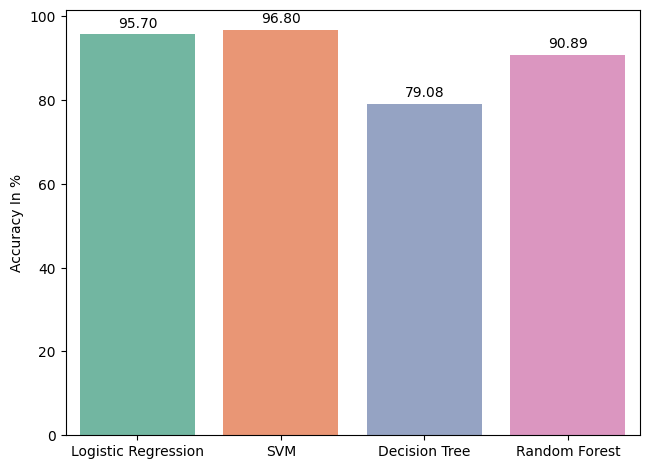

In [157]:

ax =sns.barplot(x=["Logistic Regression","SVM","Decision Tree","Random Forest"],y=[lr_accuracy*100,svm_accuracy*100,dt_accuracy*100,rf_accuracy*100],palette='Set2')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points')
plt.tight_layout()
plt.ylabel("Accuracy In %")
